# Chest X-ray Pneumonia classification
 

In [ ]:

#run this if drive not mounted USE teamenel645@gmail.com account
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


## 1) Downloading Kaggle data to drive

In [ ]:
#DONT RUN AGAIN
# ! pip install -q kaggle
# from google.colab import files
# files.upload()


In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# ! cp kaggle.json ~/.kaggle/

In [ ]:
#Changing permision to use my token to access kaggle
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! mkdir MyDrive/MyDrive/ENEL-645/data

In [ ]:
# ! kaggle datasets list
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
# ! unzip chest-xray-pneumonia.zip -d MyDrive/MyDrive/ENEL-645/data

## 2) Loading data into numpy array from drive

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import glob
import matplotlib.pyplot as plt
from skimage import transform


In [ ]:
#Loading test data
#DONT Run unless you want to re size
# data_dir_test='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/test/'
# images_test = np.asarray(glob.glob(data_dir_test + "/*/*.jpeg",recursive=True))
# labels_test = np.asarray([f.split("/")[-2] for f in images_test])



In [ ]:
#Loading train data
# #DONT Run unless you want to re size
# data_dir_train='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/train/'
# images_train = np.asarray(glob.glob(data_dir_train + "/*/*.jpeg",recursive=True))
# labels_train = np.asarray([f.split("/")[-2] for f in images_train])

In [ ]:
#Loading val data
#DONT Run unless you want to re size
# data_dir_val='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/val/'
# images_val = np.asarray(glob.glob(data_dir_val + "/*/*.jpeg",recursive=True))
# labels_val = np.asarray([f.split("/")[-2] for f in images_val])

In [ ]:
#Shuffling data
#DONT Run unless you want to re size
# from sklearn.utils import shuffle
# X_test,y_test = shuffle(images_test, labels_test, random_state=0)
# X_train,y_train = shuffle(images_train, labels_train, random_state=0)
# X_val,y_val = shuffle(images_val, labels_val, random_state=0)

In [ ]:
# plt.figure(figsize = (20,20))
# for i in range(30):
#   plt.subplot(5,6,i+1) 
#   n=plt.imread(X_test[i])
#   plt.imshow(n,cmap="gray")
#   plt.title(y_test[i])
# plt.show

## 3) Pre-Processing


### 3.1) Resizing 

In [ ]:
# Resizing 
#DONT RUN UNLESS YOU WANT TO RE-SIZE
# from skimage import transform
# from skimage import io
# img_height = 180
# img_width = 180
# #test data
# X_resized_test = np.zeros((len(X_test),img_height,img_width,1))
# for (ii,img) in enumerate(X_test):
#     X_resized_test[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #train data
# X_resized_train = np.zeros((len(X_train),img_height,img_width,1))
# for (ii,img) in enumerate(X_train):
#     X_resized_train[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #val data
# X_resized_val = np.zeros((len(X_val),img_height,img_width,1))
# for (ii,img) in enumerate(X_val):
#     X_resized_val[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))

In [ ]:
#Saving np arrays so we dont have to re-run the sizing again
#DONT RUN UNLESS YOU CHANGED THE SIZING
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test',X_resized_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test_label',y_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train',X_resized_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train_label',y_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val',X_resized_val)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val_label',y_val)

In [ ]:
#Loading np arrays
Xtest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test.npy')
ytest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test_label.npy')
Xtrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train.npy')
ytrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train_label.npy')
Xval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val.npy')
yval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val_label.npy')

In [ ]:
#Resplitting the train-val data to hav 70/30 ratio
Xtrain_val=np.vstack((Xtrain_actual,Xval_actual))
Ytrain_val=np.concatenate((ytrain_actual,yval_actual))
Xtrain_val.shape

(5232, 180, 180, 1)

In [ ]:
#Filtering the indexes of normal and pnemonia
pneumonia=np.where(Ytrain_val=='PNEUMONIA')
normal=np.where(Ytrain_val=='NORMAL')

In [ ]:
import random
img_height = 180
img_width = 180
ln=len(normal[0])*2
#Createing np of equal proportion
X_filtered= np.zeros((ln,img_height,img_width,1))
Y_filtered=list(range(ln))

In [ ]:
#Adding PNEUMONIA pics
for i in range(len(normal[0])):
  rand=random.choice(pneumonia[0])
  X_filtered[i]=Xtrain_val[rand]
  Y_filtered[i]=Ytrain_val[rand]


In [ ]:
# Adding Normal
for i in range(len(normal[0]),ln):
  rand=random.choice(normal[0])
  X_filtered[i]=Xtrain_val[rand]
  Y_filtered[i]=Ytrain_val[rand]


In [ ]:
#converting list to np
Y_filtered=np.array(Y_filtered)

In [ ]:
#MAKE SURE to specify wheter to use filtered dataset or original
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(X_filtered,Y_filtered,test_size=0.3,shuffle=True,stratify=Y_filtered)

<function matplotlib.pyplot.show>

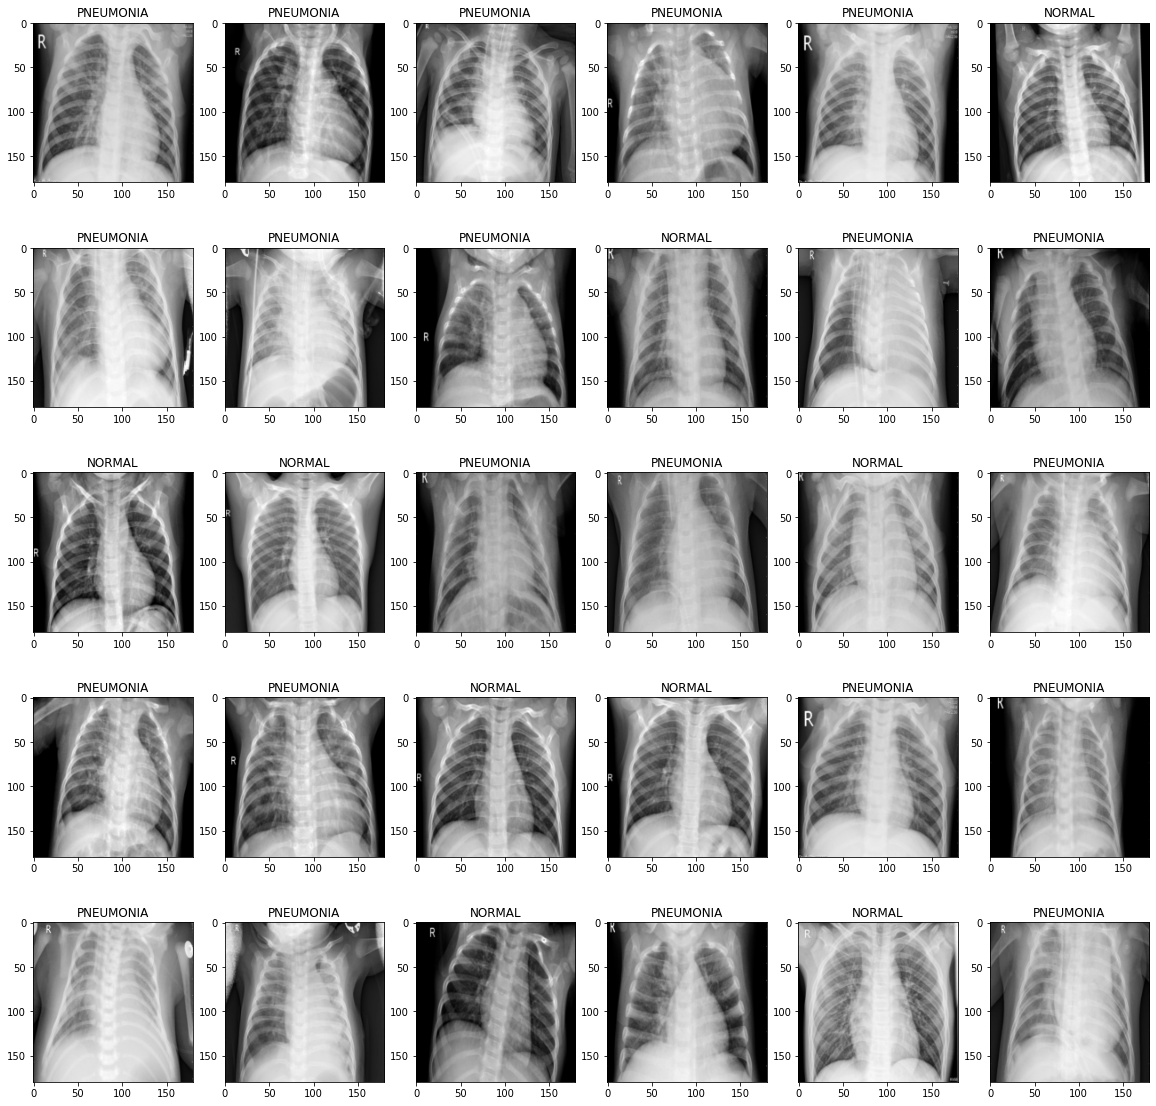

In [ ]:
#Sample of resized data
##Imshow can either do 2d or RGM numpy arrays so i had to reshape inorder to display
b=Xtest.reshape(624,180,180)
plt.figure(figsize = (20,20))
for i in range(30):
  plt.subplot(5,6,i+1) 
  plt.imshow(b[i],cmap="gray")
  plt.title(ytest[i])
plt.show

### 3.2) Data scaling

In [ ]:
# The data seems to be already scale dbetween 0 and 1, so we do nothing
print(Xtrain.min(),Xtrain.max(),Xtrain.mean(),Xtrain.std())
print(Xval.min(),Xval.max(),Xval.mean(),Xval.std())

0.0 1.0 0.47640377534951905 0.2384543348487971
0.0 1.0 0.47688179191775487 0.23781669011449622


### 3.3) One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
##Converting labels to numbers
le=LabelEncoder()
le.fit(ytrain)
classes_names=[]
print("Label Encoding:\n1 is for label: ",le.inverse_transform([1]),"\n0 is for label: ",le.inverse_transform([0]))
ytrain_le=le.transform(ytrain)
ytest_le=le.transform(ytest)
yval_le=le.transform(yval)
##One hot encoding
Y_train_oh = to_categorical(ytrain_le)
Y_val_oh = to_categorical(yval_le)
Y_test_oh = to_categorical(ytest_le)
Y_test_oh[5]


Label Encoding:
1 is for label:  ['PNEUMONIA'] 
0 is for label:  ['NORMAL']


array([1., 0.], dtype=float32)

In [ ]:
Xtrain.shape

(1888, 180, 180, 1)

### 3.4) Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
batch_size = 32
gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}
train_gen = ImageDataGenerator(**gen_params)
val_gen = ImageDataGenerator(**gen_params)
# X_train_expanded=np.expand_dims(Xtrain,axis=3)
train_gen.fit(Xtrain,seed = 1)
val_gen.fit(Xval, seed = 1)

train_flow = train_gen.flow(Xtrain,Y_train_oh,batch_size = batch_size)
val_flow = val_gen.flow(Xval,Y_val_oh,batch_size = batch_size) 


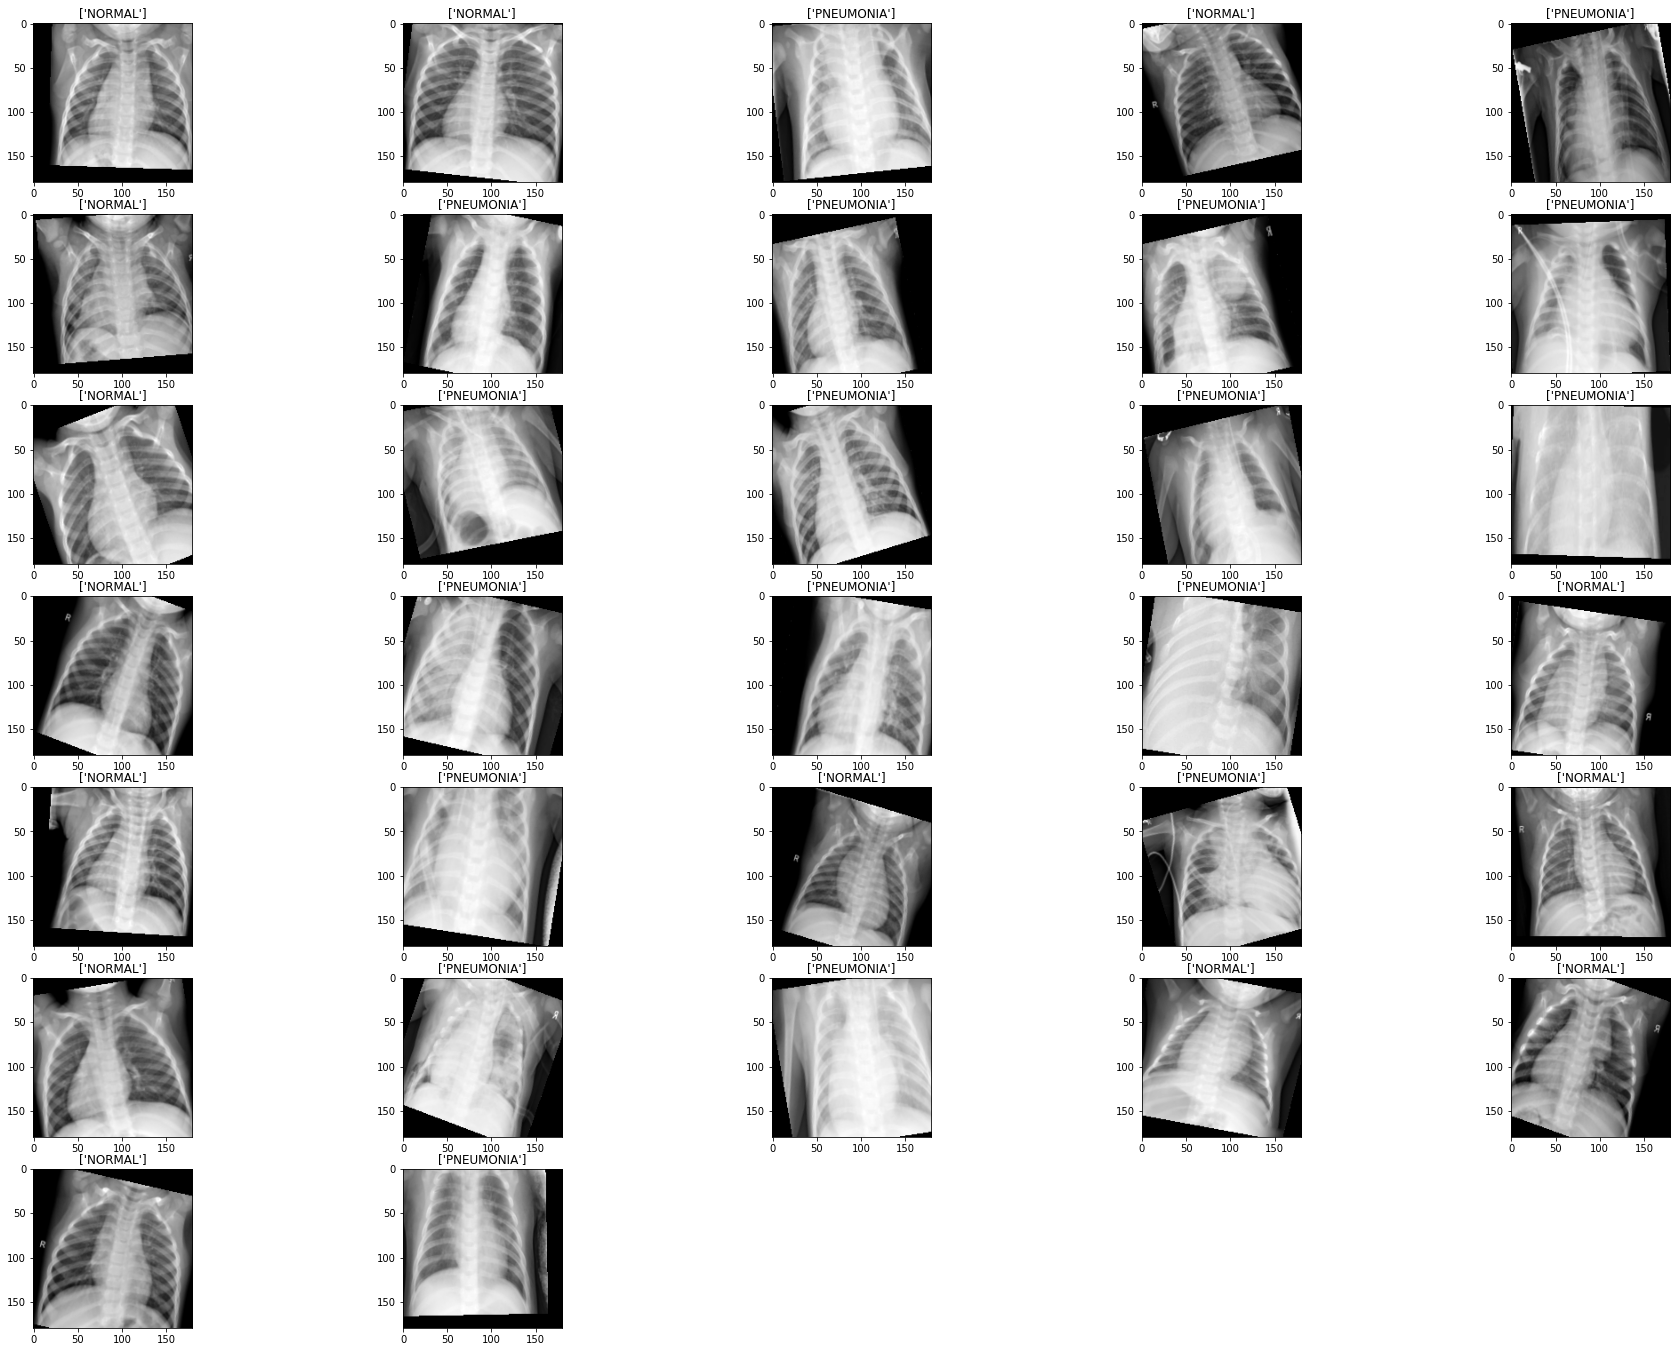

In [ ]:
#Displaying sample of Augmented data
Xbatch,Ybatch = train_flow.__getitem__(0)
plt.figure(figsize = (32,24))
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    temp=Xbatch[ii].reshape(180,180)#dropping the channel axis
    plt.imshow(temp, cmap = "gray")
    plt.title(le.inverse_transform([int(Ybatch[ii].argmax())]))#using inverse of the label encoder to find the label
plt.show()

## 4) Defining Callbacks


In [ ]:
model_name_inception = "MyDrive/MyDrive/ENEL-645/models/team_8_PT_InceptionV3.h5"

# define your callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)
monitor = tf.keras.callbacks.ModelCheckpoint(model_name_inception, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=False,\
                                             mode='min')
# learning rate scheduler
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 5) Models

### 5.1) Pre-trained InceptionV3 Model

#### 5.1.1) Definition

In [ ]:
# Load pre-trained model (InceptionV3 without the top)
from keras.layers import Input, Concatenate

img_size_target = 180
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input]) 

base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,
    input_tensor = img_conc)
base_model.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
# Add a top (prediction layers)

x1 = base_model(base_model.input, training = False)
x2 = tf.keras.layers.Flatten()(x1)
out = tf.keras.layers.Dense(2, activation = 'softmax')(x2)
model = tf.keras.Model(inputs = base_model.input, outputs = out)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 1)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 65538     
Total params: 21,868,322
Trainable params: 65,538
Non-trainable params: 21,802,784
_________________________________________________________________
None


#### 5.1.2) Train 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-2),
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

model.fit(train_flow, epochs= 100, verbose= 1, callbacks= [early_stop, monitor, lr_schedule], validation_data=(val_flow))

Epoch 1/100
59/59 [==============================] - 46s 158ms/step - loss: 17.6435 - accuracy: 0.7307 - val_loss: 4.7556 - val_accuracy: 0.8728
Epoch 2/100
59/59 [==============================] - 7s 121ms/step - loss: 2.6339 - accuracy: 0.9127 - val_loss: 6.1811 - val_accuracy: 0.8469
Epoch 3/100
59/59 [==============================] - 7s 125ms/step - loss: 4.0302 - accuracy: 0.8963 - val_loss: 2.7363 - val_accuracy: 0.9272
Epoch 4/100
59/59 [==============================] - 7s 120ms/step - loss: 2.6450 - accuracy: 0.9293 - val_loss: 1.7805 - val_accuracy: 0.9358
Epoch 5/100
59/59 [==============================] - 7s 125ms/step - loss: 1.9145 - accuracy: 0.9230 - val_loss: 4.5158 - val_accuracy: 0.8901
Epoch 6/100
59/59 [==============================] - 7s 123ms/step - loss: 4.2621 - accuracy: 0.8966 - val_loss: 13.4180 - val_accuracy: 0.7975
Epoch 7/100
59/59 [==============================] - 7s 122ms/step - loss: 4.4618 - accuracy: 0.9086 - val_loss: 3.0450 - val_accuracy: 0.9

In [ ]:
model = tf.keras.models.load_model(model_name_inception)
model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-9),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
            )

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 1)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 4, 4, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 65538     
Total params: 21,868,322
Trainable params: 21,833,890
Non-trainable params: 34,432
_________________________________________________________________
None


In [ ]:
model.fit(train_flow, epochs= 100, verbose= 1, callbacks= [early_stop, monitor, lr_schedule],
          validation_data=(val_flow))

Epoch 1/100
59/59 [==============================] - 19s 221ms/step - loss: 0.3831 - accuracy: 0.9825 - val_loss: 0.8190 - val_accuracy: 0.9654
Epoch 2/100
59/59 [==============================] - 12s 203ms/step - loss: 0.3639 - accuracy: 0.9817 - val_loss: 0.8543 - val_accuracy: 0.9667
Epoch 3/100
59/59 [==============================] - 12s 203ms/step - loss: 0.2849 - accuracy: 0.9783 - val_loss: 0.6040 - val_accuracy: 0.9605
Epoch 4/100
59/59 [==============================] - 12s 206ms/step - loss: 0.4293 - accuracy: 0.9739 - val_loss: 0.6880 - val_accuracy: 0.9654
Epoch 5/100
59/59 [==============================] - 12s 206ms/step - loss: 0.2747 - accuracy: 0.9821 - val_loss: 0.6322 - val_accuracy: 0.9667
Epoch 6/100
59/59 [==============================] - 12s 204ms/step - loss: 0.2314 - accuracy: 0.9824 - val_loss: 0.8140 - val_accuracy: 0.9630
Epoch 7/100
59/59 [==============================] - 12s 203ms/step - loss: 0.4279 - accuracy: 0.9742 - val_loss: 0.6011 - val_accuracy:

#### 5.1.3) Evaluate 

In [ ]:
model = tf.keras.models.load_model(model_name_inception)
metrics = model.evaluate(Xtest,Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

20/20 [==============================] - 2s 53ms/step - loss: 3.2987 - accuracy: 0.9006
Categorical cross-entropy: 3.2987091541290283
Accuracy: 0.9006410241127014
